<center>
<b><font size=6>Industry 4.0 의 중심, BigData</font></b>
</center>

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# 공공데이터 활용

## Case4. 한국노인인력개발원 노인일자리사업 참여노인 실태조사
https://www.data.go.kr/dataset/3073666/fileData.do

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [2]:
df_code = pd.read_csv('data/public_old_man_job_code_2016.csv', encoding='EUC-KR')
len(df_code)

3082

In [3]:
df_code.head()

번호  항목  값  라벨
0  SQ1_1  지역  1  서울
1  SQ1_1  지역  2  부산
2  SQ1_1  지역  3  대구
3  SQ1_1  지역  4  인천
4  SQ1_1  지역  5  광주

In [4]:
df_code.tail()

번호                              항목   값  \
3077  H7_3순위  지속 참여하면서 초기 사업에 비해 어려워진 점(3순위)   9   
3078  H7_3순위  지속 참여하면서 초기 사업에 비해 어려워진 점(3순위)  10   
3079  H7_3순위  지속 참여하면서 초기 사업에 비해 어려워진 점(3순위)  11   
3080  H7_3순위  지속 참여하면서 초기 사업에 비해 어려워진 점(3순위)  12   
3081  H7_3순위  지속 참여하면서 초기 사업에 비해 어려워진 점(3순위)  99   

                                       라벨  
3077  업무 수행 시 참조 할 수 있는 자세한 안내 자료(매뉴얼) 부족  
3078                           직무관련 교육 부족  
3079                                   없음  
3080                                   기타  
3081                              모름/ 무응답

In [5]:
df_code['항목'].unique()

array(['지역', '거주하는 시군구 유형', '거주하는 읍면동 유형', '성별', '연령',
       '2017년 사업 및 구직 신청 월(달)', '2018년 사업 및 구직 신청 월(달)',
       '2019년 사업 및 구직 신청 월(달)', '2020년 사업 및 구직 신청 월(달)',
       '2021년 사업 및 구직 신청 월(달)', '2022년 사업 및 구직 신청 월(달)', '수행기관 및 유형',
       '참여사업 및 유형', '노인 일자리 및 사회활동 지원사업 활동 내용',
       '노인 일자리 및 사회활동 지원사업 최초 참여 여부', '노인 일자리 및 사회활동 지원사업에 처음 참여한 년도',
       '사업단 및 사업 유형 변경 경험', '사업단 및 사업 유형 변경 이유', '전년도 동일 사업단 및 근무처 활동 여부',
       '노인 일자리 및 사회활동 지원사업 인지 경로', '노인 일자리 및 사회활동 지원사업 참여 동기(2순위)',
       '노인 일자리 및 사회활동 지원사업 참여 동기(3순위)', '노인 일자리 및 사회활동 지원사업 참여 동기(4순위)',
       '노인 일자리 및 사회활동 지원사업 참여 동기(5순위)', '노인 일자리 및 사회활동 지원사업 참여 동기(6순위)',
       '노인 일자리 및 사회활동 지원사업 참여 동기(7순위)', '노인 일자리 및 사회활동 지원사업 참여 동기(8순위)',
       '노인 일자리 및 사회활동 지원사업 참여 동기(9순위)', '노인 일자리 및 사회활동 지원사업 참여 동기(10순위)',
       '노인 일자리 및 사회활동 지원사업_1) 주당 활동(근무) 시간',
       '노인 일자리 및 사회활동 지원사업_2) 주당 활동(근무) 일수 유형',
       '노인 일자리 및 사회활동 지원사업_2) 주당 활동(근무) 일수',
       '노인 일자리 및 사회활동 지원사업_3) 활동(근무) 일', '노인 일자리 및 사회활동 지원사업_4) 교대제 

In [6]:
key_word = '노인 일자리 및 사회활동 지원사업 참여 동기' 
key_word.find('참여 동기')

19

In [7]:
df_code['검색결과'] = ""

for idx in np.arange(len(df_code)):
    # result = df_code['항목'].values[idx].find(key_word)
    result = key_word in df_code['항목'].values[idx]
    df_code['검색결과'].values[idx] = result
    

In [8]:
df_code.head()

번호  항목  값  라벨   검색결과
0  SQ1_1  지역  1  서울  False
1  SQ1_1  지역  2  부산  False
2  SQ1_1  지역  3  대구  False
3  SQ1_1  지역  4  인천  False
4  SQ1_1  지역  5  광주  False

In [9]:
df_code['검색결과'][110:120]

110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118     True
119     True
Name: 검색결과, dtype: object

In [10]:
df_code[:][df_code['검색결과']==True]

번호                              항목   값                라벨  검색결과
118  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   1            생계비 마련  True
119  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(3순위)   2             용돈 마련  True
120  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(4순위)   3  사회참여 및 관계 형성의 수단  True
121  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(5순위)   4         건강 유지의 수단  True
122  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(6순위)   5    자아실현 및 자기발전 수단  True
123  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(7순위)   6        여가시간 활용 수단  True
124  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(8순위)   7         일을 통한 즐거움  True
125  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(9순위)   8                기타  True
126  A4_1순위  노인 일자리 및 사회활동 지원사업 참여 동기(10순위)  99           모름/ 무응답  True
127  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   1            생계비 마련  True
128  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   2             용돈 마련  True
129  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   3  사회참여 및 관계 형성의 수단  True
130  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   4         건강 유지의 수단  True
131  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   5    자아실현 및 자기발전 수단  True
132  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   6        여가시간 활용 수단  True
133  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   7         일을 통한 즐거움  True
134  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   8                기타  True
135  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)  99           모름/ 무응답  True

In [11]:
key_word = '노인 일자리 및 사회활동 지원사업 참여 동기' 
df_code['검색결과'] = ""

for idx in np.arange(len(df_code)):
    # result = df_code['항목'].values[idx].find(key_word)
    result = key_word in df_code['항목'].values[idx]
    df_code['검색결과'].values[idx] = result
    
df_code[:][df_code['검색결과']==True]

번호                              항목   값                라벨  검색결과
118  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   1            생계비 마련  True
119  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(3순위)   2             용돈 마련  True
120  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(4순위)   3  사회참여 및 관계 형성의 수단  True
121  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(5순위)   4         건강 유지의 수단  True
122  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(6순위)   5    자아실현 및 자기발전 수단  True
123  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(7순위)   6        여가시간 활용 수단  True
124  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(8순위)   7         일을 통한 즐거움  True
125  A4_1순위   노인 일자리 및 사회활동 지원사업 참여 동기(9순위)   8                기타  True
126  A4_1순위  노인 일자리 및 사회활동 지원사업 참여 동기(10순위)  99           모름/ 무응답  True
127  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   1            생계비 마련  True
128  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   2             용돈 마련  True
129  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   3  사회참여 및 관계 형성의 수단  True
130  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   4         건강 유지의 수단  True
131  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   5    자아실현 및 자기발전 수단  True
132  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   6        여가시간 활용 수단  True
133  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   7         일을 통한 즐거움  True
134  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   8                기타  True
135  A4_2순위   노인 일자리 및 사회활동 지원사업 참여 동기(2순위)  99           모름/ 무응답  True

In [12]:
df = pd.read_csv('data/public_old_man_job_data_2016.csv')
len(df)

C:\Python\Anaconda3-50\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (75,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2500

In [13]:
df.head(10)

ID  SQ1_1  SQ1_2  SQ1_3  SQ2  SQ3  SQ4  SQ5  SQ6  A1   ...    H3_1순위  \
0    4      9      1      3    1   80    2    4    3  34   ...         4   
1   24      9      2      1    2   79    3    7    3  31   ...         1   
2   56      9      1      1    1   74    2    8    3  34   ...         1   
3  131      9      2      1    2   63    1    5    7  71   ...         1   
4  214      9      1      1    2   67    1    8    3  34   ...             
5  265      9      1      3    2   72    2    4    1  11   ...         1   
6  349      9      1      3    1   79    2    4    3  34   ...         1   
7  363      9      1      3    1   68    2    5    3  35   ...             
8  386      9      2      1    2   59    3    4    6  62   ...             
9  396      9      1      3    2   74    3    5    8  83   ...         1   

  H3_2순위 H4_1순위 H4_2순위 H5_1순위  H5_2순위  H6 H7_1순위  H7_2순위  H7_3순위  
0      1      4      3      1       2   5     11                  
1      4      4      3      2       3   4      1       2       4  
2      4      1      2      4       3   2      1       6          
3      2      1      2      1       2   4      2       7       5  
4                                                                 
5      4      2      4      1       4   5     11                  
6      3      3      4      1       3   5      3       5       6  
7                                                                 
8                                                                 
9      2      4      2      1       2   9     11                  

[10 rows x 413 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Columns: 413 entries, ID to H7_3순위
dtypes: float64(5), int64(177), object(231)
memory usage: 7.9+ MB


In [15]:
df.set_index('ID', inplace=True)           
df.head(10)

SQ1_1  SQ1_2  SQ1_3  SQ2  SQ3  SQ4  SQ5  SQ6  A1  A2  ...   H3_1순위  \
ID                                                         ...            
4        9      1      3    1   80    2    4    3  34   2  ...        4   
24       9      2      1    2   79    3    7    3  31   2  ...        1   
56       9      1      1    1   74    2    8    3  34   2  ...        1   
131      9      2      1    2   63    1    5    7  71   2  ...        1   
214      9      1      1    2   67    1    8    3  34   1  ...            
265      9      1      3    2   72    2    4    1  11   2  ...        1   
349      9      1      3    1   79    2    4    3  34   2  ...        1   
363      9      1      3    1   68    2    5    3  35   1  ...            
386      9      2      1    2   59    3    4    6  62   1  ...            
396      9      1      3    2   74    3    5    8  83   2  ...        1   

    H3_2순위 H4_1순위 H4_2순위  H5_1순위  H5_2순위 H6  H7_1순위  H7_2순위 H7_3순위  
ID                                                                  
4        1      4      3       1       2  5      11                 
24       4      4      3       2       3  4       1       2      4  
56       4      1      2       4       3  2       1       6         
131      2      1      2       1       2  4       2       7      5  
214                                                                 
265      4      2      4       1       4  5      11                 
349      3      3      4       1       3  5       3       5      6  
363                                                                 
386                                                                 
396      2      4      2       1       2  9      11                 

[10 rows x 412 columns]

In [16]:
column_name = 'A4_2순위'

df_result = df[column_name].value_counts()
df_result

2    1034
4     377
7     305
1     271
3     210
6     159
5      71
       68
8       5
Name: A4_2순위, dtype: int64

In [17]:
# df_result.index.names.r

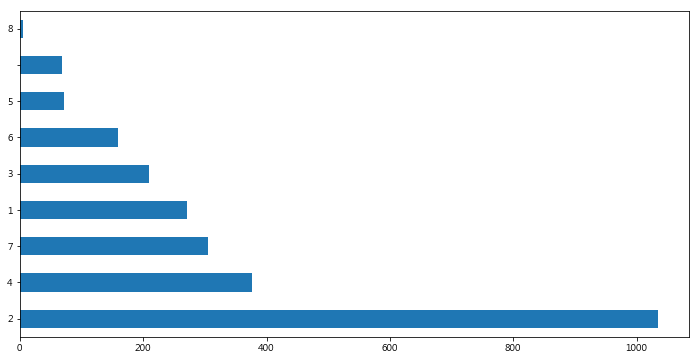

In [18]:
df_result.plot(kind='barh')


In [19]:
df_result.index

Index(['2', '4', '7', '1', '3', '6', '5', ' ', '8'], dtype='object')

In [20]:
df_item = df_code[:][df_code['번호']==column_name]
df_item

번호                             항목   값                라벨  검색결과
127  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   1            생계비 마련  True
128  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   2             용돈 마련  True
129  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   3  사회참여 및 관계 형성의 수단  True
130  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   4         건강 유지의 수단  True
131  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   5    자아실현 및 자기발전 수단  True
132  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   6        여가시간 활용 수단  True
133  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   7         일을 통한 즐거움  True
134  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)   8                기타  True
135  A4_2순위  노인 일자리 및 사회활동 지원사업 참여 동기(2순위)  99           모름/ 무응답  True

In [21]:
df_label = df_item['라벨'][df_item['값']==1]
df_label.values[0]

'생계비 마련'

In [24]:
% whos

Variable       Type         Data/Info
-------------------------------------
column_name    str          A4_2순위
df             DataFrame            SQ1_1  SQ1_2  SQ1<...>[2500 rows x 412 columns]
df_code        DataFrame              번호             <...>\n[3082 rows x 5 columns]
df_item        DataFrame             번호              <...>9           모름/ 무응답  True
df_label       Series       127    생계비 마련\nName: 라벨, dtype: object
df_result      Series       2    1034\n4     377\n7  <...>ame: A4_2순위, dtype: int64
font_manager   module       <module 'matplotlib.font_<...>lotlib\\font_manager.py'>
font_name      str          Malgun Gothic
idx            int32        3081
key_word       str          노인 일자리 및 사회활동 지원사업 참여 동기
np             module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd             module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt            module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
rc             functio

In [25]:
# DataFrame 객체 생성2
frame2 = pd.DataFrame(df, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

year  state  pop  debt
one     NaN    NaN  NaN   NaN
two     NaN    NaN  NaN   NaN
three   NaN    NaN  NaN   NaN
four    NaN    NaN  NaN   NaN
five    NaN    NaN  NaN   NaN

#### <font color='blue'> # 준공일자 기준으로 정렬 </font>

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>